# **Apa itu Machine Learning?**

Pada dasarnya, machine learning merupakan membangun program dengan pengaturan parameter (sebuah array atau desimal) yang mana berguna untuk memperbarui model dalam melihat data sebelumnya. Machine Learning merupakan bagian dari **Artificial Intelligence** yang mana membuat komputer memiliki pemikiran didalamnya tidak hanya sekedar mengambil atau menghasilkan data seperti database.

Biasanya kita ketahui bahwa ada dua tipe machie learning:
1. Supervised Learning: Disini membuat algoritma untuk memprediksi variabel dependent Y dari variabel independent X yang mana dicirikan sebagai predictive models. Supervised Learning sendiri memiliki beberapa tipe model: Classification problems (output variabel adalah label atau kategori, seperti Logistic Regression, Decision Trees, Random Forest, KNN and Suppor Vector Machine), dan Regression problems (output variabel adalah continuous variable, seperti Linear Regression, Decision Trees, Neural Networks)
2. Unsupervised Learning: Kebalikan dari Supervised Learning, yang artinya dependent Y tidak ada dalam data set. Disini berguna untuk menemukan patern atau ketentuan untuk melakukan grouping data yang mana berguna untuk descriptive analysis (menemukan insight pada data). Unsupervised Learning sendiri memiliki beberapa tipe model: Dimensionality Reduction (Bagaimana caranya untuk mengurangi jumlah variabel dalam dataset, biasanya menggunakan Principal Component Analysis (PCA)), dan Clustering Analysis (Bagaimana caranya untuk melakukan pengelompokan data yang memiliki pola yang sama, seperti K-Means)

Ada beberapa tipe machie learning lainnya seperti Reinforcement Learning dan Semi-Supervised Learning dan sebagainya yang berkembang sampai saat ini.

# **Supervised Learning**

## Classification Learning

Disini kita aka mempelajari contoh penggunaan model klasifikasi untuk pembelajaran. Dataset yang digunakan ditandai dua warna yang berbeda.

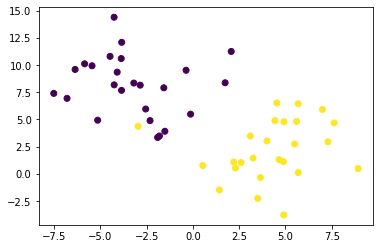

In [3]:
# Buat random samples
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=42, cluster_std=2.90)

import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

Jika kita perhatikan data diatas, algortima classification membagi batas antar dua data yakni dengan berbeda warna.

In [4]:
# Membuat model
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", alpha=0.01, max_iter=200, fit_intercept=True)
clf.fit(X, y)

SGDClassifier(alpha=0.01, max_iter=200)

In [5]:
# Mari kita coba buat garis pemisah
X_min, X_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

# Perpotongan data
import numpy as np
cut_X, cut_y = np.meshgrid(np.arange(X_min, X_max, 0.05), np.arange(y_min, y_max, 0.05))
Z = clf.predict(np.c_[cut_X.ravel(), cut_y.ravel()]).reshape(cut_X.shape)

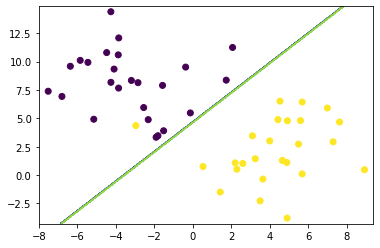

In [6]:
# Tampilkan dalam grafis
plt.contour(cut_X, cut_y, Z)
plt.scatter(X[:, 0], X[:,1], c=y)
plt.show()

Dengan kita membuat perpotongan seperti diatas akan membantu kita dalam memetakan data yang mana akan memprediksi data tersebut termasuk dalam kelompok kuning atau ungu.

## Regression Learning

Disini kita akan memetakan pembelajaran tentang regression.

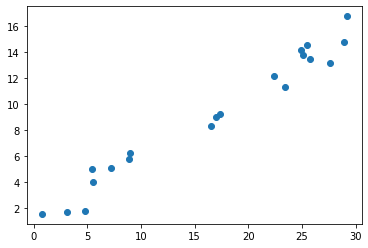

In [7]:
# persiapkan sumbu yang digunakan
a = 0.5
b = 1.0

# Kita coba membuat X dari 0 sampai 10
X = 30 * np.random.random(20)

# Rumus Regresi Linear sederhana y = a*X + b (dan estimasi)
y = a*X + b + np.random.normal(size=X.shape)

# Pemetaan
plt.scatter(X, y)
plt.show()

In [8]:
# Mari kita buat model sederhana
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X[:, None], y)

LinearRegression()

In [9]:
# Penggunaan _ untuk parameter
print(clf.coef_)
print(clf.intercept_)

[0.4913596]
1.0326684616305428


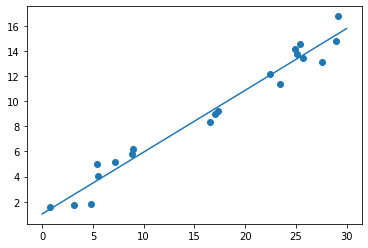

In [10]:
# Mari kita melakukan pembuatan grafis
X_new = np.linspace(0, 30, 100) # dari 0 - 30 dengan 100 titik
y_new = clf.predict(X_new[:, None])
plt.scatter(X, y)
plt.plot(X_new, y_new)
plt.show()

Dari grafis diatas kita belajar bahwa model belajar dari training data yang mana selanjutnya menggunakan test data untuk melaukan prediksi.

# **Unsupervised Learning**

Disini kita akan mempelajari unsupervised learning dengan menggunakan data Iris yang tersedia dalam sklearn.

In [11]:
# Memanggil datasets Iris
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [12]:
n_samples, n_features = iris.data.shape

# Menampilkan dataset yang ada
print((n_samples, n_features))
print(iris.data[0])

(150, 4)
[5.1 3.5 1.4 0.2]


In [13]:
# Menampilkan target dari dataset
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [14]:
print(iris.target)
print(iris.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


## Dimensionality Reduction: PCA

Merupakan cara untuk mengurangi variabel yang mana menemukan kombinasi variabel yang menceritakan variansi data keseluruhan. Mari kita coba implementasikan di iris data, jika kita ketahui bahwa Iris tidak bisa diplot 2D karena memiliki 4 features. Kita akan mencoba mengambil 2 kombinasi sepal dan petal dimensi untuk dilakukan visualisasi.

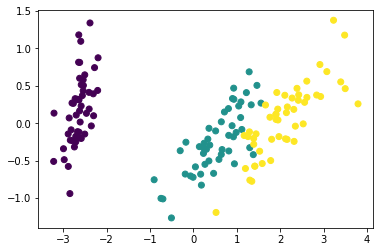

In [24]:
X, y = iris.data, iris.target

# Mengabungkan kombinasi dengan PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)
X_reduced = pca.transform(X)
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:304: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


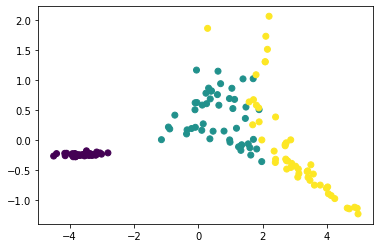

In [22]:
# Mengabungkan kombinasi dengan ISOMAP
from sklearn.manifold import Isomap
pca = Isomap(n_components=3)
pca.fit(X)
X_reduced = pca.transform(X)
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y)
plt.show()

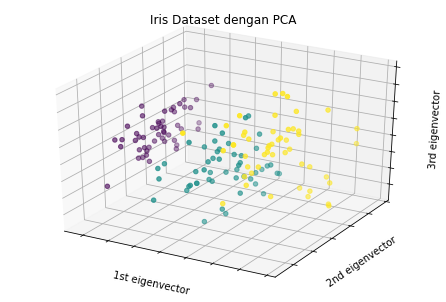

In [25]:
# Kita visualisasi dalam 3D
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.set_title("Iris Dataset dengan PCA", size = 12)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y)
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")
ax.w_xaxis.set_ticklabels(())
ax.w_yaxis.set_ticklabels(())
ax.w_zaxis.set_ticklabels(())
plt.show()

## Clustering: K-means

Disini kita akan mencoba melakukan observasi secara grup untuk kriteria yang sama dalam beberapa clusters. Ingat, adanya cluster akan menutupi struktur yang rahasia dalam data jika kriteria yang digunakan dihighlight.

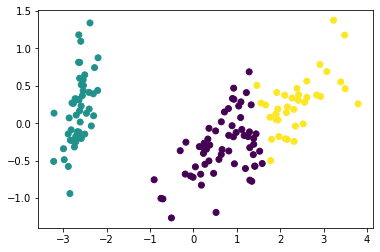

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred)
plt.show()

In [28]:
# Mari kita evaluasi data tersebut dengan confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
np.set_printoptions(precision=2)
print(cm)

[[ 0 50  0]
 [48  0  2]
 [14  0 36]]


In [29]:
# Fungsi confusion matrix
def plot_cm(cm, title="Confusion Matrix", cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation="nearest", cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(iris.target_names))
  plt.xticks(tick_marks, iris.target_names, rotation=45)
  plt.yticks(tick_marks, iris.target_names)
  plt.tight_layout()
  plt.xlabel("Predicted Label")
  plt.ylabel("Actual Label")

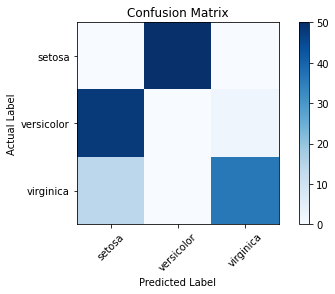

In [30]:
plt.figure()
plot_cm(cm)

# **Pelajaran Tambahan**

Disini kita akan mempelajari tentang logistik regresi dengan memprediksi data IRIS. Mari kita coba!

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, 
                                                    iris.target,
                                                    test_size=0.3,
                                                    random_state=42)

In [33]:
# Buat model
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Lihat hasil akurasi y_pred dengan y_test 
float((y_pred == y_test).mean())

1.0

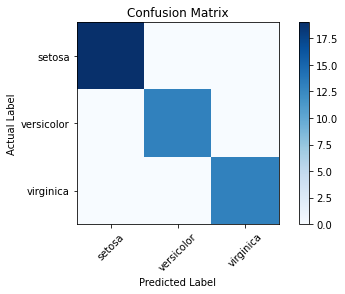

In [34]:
plt.figure()
plot_cm(confusion_matrix(y_test, y_pred))

## Catatanku!

Scikit-Learn merupakan modul yang berguna untuk beberapa metode. Scikit-learn estimator memiliki fungsi bernama **model** untuk sebuah estimator, tersedia dalam:
1. All estimator: 
* **model.fit()** untuk melakukan fit training data. Ini dapat digunakan untuk supervised learning (menerima dua arguments, X dan y -- _model.fit(X, y)_), begitupun unsupervised learning (menerima satu arguments, X saja -- _model.fit(X)_).
2. Hanya supervised estimator: 
* **model.predict()** untuk memberikan prediksi data dari data baru yang menerima satu arguments (contoh: _model.predict(Xnew)_), 
* **model.predict_proba()** untuk menyelesaikan masalah klasifikasi yang mana mengeluarkan probabilitas observasi dari setiap categorical data (contoh: model.predict_proba(X_new), namun hasil probabilitas tertinggi dengan _model.predict(X_new)_)
* **model.score()** untuk regression problem atau classification problem yang menggunakan metode skoring yang berada dari 0 sampai 1, skoring besar artinya fitting sudah bagus.
3. Hanya unsupervised estimator:
* **model.predict()** untuk memprediksilabel clustering dari dataset
* **model.transform()** untuk transformasi data baru ke basis data. Ini hanya menerima satu arguments saja yang mempresentasikan data baru. Contoh: _model.transform(Xnew)_
* **model.fit_transform()** untuk fit dan transformasi data pada inputan data yang menghasilkan performansi yang efisien.


In [35]:
# Berikut ini rule map penggunaan scikit-learn
from IPython.display import Image
Image(url="http://scikit-learn.org/dev/_static/ml_map.png")